# Foundations

In [12]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt

def square(x: ndarray) -> ndarray:
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    return np.maximum(0.2 * x, x)

## 도함수 기초
멘탈 모델 측면에서 서술해보자. 어떤 개념인가.

### 수학적 서술
$$
\frac{\partial{f}}{\partial{u}}(a) = \lim_{\Delta \rightarrow 0}\frac{f(a + \Delta) - f(a - \Delta)}{2 \times \Delta}
$$

### 다이어그램
- 그래프의 한 점에서의 접선 기울기

### 코드
```python
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray], 
          input_: ndarray, 
          delta: float = 0.001
          ) -> ndarray:
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)
```


In [39]:
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray], 
          input_: ndarray, 
          delta: float = 0.001
          ) -> ndarray:
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

def plot_simple(func: Callable[[ndarray], None], 
                input_: ndarray) -> None:
    plt.plot(input_, func(input_))
    plt.show()

## 중첩 함수

### 코드

In [42]:
from typing import List

Array_Function = Callable[[ndarray], ndarray]
Chain = List[Array_Function]

def chain_length_2(chain: Chain, 
                   x: ndarray
                   ) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain"
    '''
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"
    
    f1 = chain[0]
    f2 = chain[1]
    
    return f2(f1(x))

def chain_functions(chain: Chain, x:ndarray) -> ndarray:
    '''
    mash's special treat!
    '''
    if len(chain) == 0:
        return x
    
    return chain[-1](chain_functions(chain[:-1], x))


## The Chain Rule

### Math
$$\begin{aligned}
y &= f_2(f_1(x)) \\
\frac{\partial{f_2}}{\partial{u}}(x) &= \lim_{\Delta \rightarrow 0}\frac{f_2(f_1(x + \Delta)) - f_2(f_1(x))}{\Delta} \\
&= \lim_{\Delta \rightarrow 0}\frac{f_2(f_1(x + \Delta)) - f_2(f_1(x))}{f_1(x + \Delta) - f_1(x)} \times \lim_{\Delta \rightarrow 0}\frac{f_1(x + \Delta) - f_1(x)}{\Delta} \\
&= \frac{\partial{f_2}}{\partial{u}}(f_1(x)) \times \frac{\partial{f_1}}{\partial{u}}(x) \\
\end{aligned}$$

### Code

In [56]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-x))

def chain_deriv_2(chain:Chain, 
                  input_range: ndarray) -> ndarray:
    assert len(chain) == 2, \
    "This function requires 'Chain' object of length 2"
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    
    f1 = chain[0]
    f2 = chain[1]
    
    # df1/dx
    f1_of_x = f1(input_range)
    
    # df1/du
    df1dx = deriv(f1, input_range)
    
    # df2/du(f1(x))
    df2du = deriv(f2, f1_of_x)
    
    # return deriv(f3, f2(f1(input_range))) * deriv(f2, f1(input_range)) * deriv(f1, input_range)
    return df2du * df1dx

def chain_deriv_functions(chain: Chain, 
                          x: ndarray
                          ) -> ndarray:
    '''
    mash's spacial treat!
    '''
    if len(chain) == 1:
        return deriv(chain[0], x)
    
    return deriv(chain[-1], chain_functions(chain[:-1], x)) * chain_deriv_functions(chain[:-1], x)

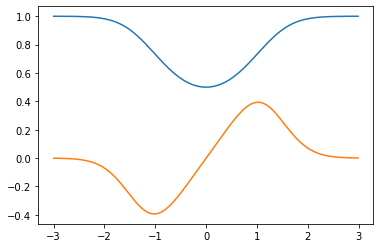

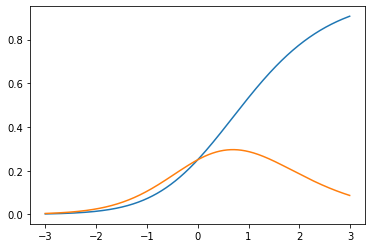

In [57]:

PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

def plot_chain(chain: Chain, 
               range: ndarray) -> None:
    y = chain_functions(chain, range)
    plt.plot(range, y)

def plot_chain_deriv(chain: Chain, 
                     range: ndarray) -> None:
    y = chain_deriv_functions(chain, range)
    plt.plot(range, y)

plot_chain(chain_1, PLOT_RANGE)
plot_chain_deriv(chain_1, PLOT_RANGE)
plt.show()

plot_chain(chain_2, PLOT_RANGE)
plot_chain_deriv(chain_2, PLOT_RANGE)
plt.show()

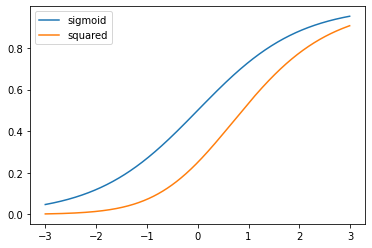

In [22]:
plt.plot(PLOT_RANGE, sigmoid(PLOT_RANGE))
plot_chain(chain_2, PLOT_RANGE)
plt.legend(['sigmoid', 'squared'])

## 3차 합성 함수 미분

### Math

$$
\begin{aligned}
y &= f_3(f_2(f_1(x))) \\
\frac{\partial{f_3}}{\partial{u}}(x) &= \frac{\partial{f_3}}{\partial{u}}(f_2(f_1(x))) \times
\frac{\partial{f_2}}{\partial{u}}(f_1(x)) \times \frac{\partial{f_1}}{\partial{u}}(x)
\end{aligned}
$$

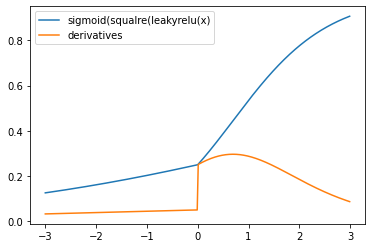

In [59]:
plot_chain([leaky_relu, sigmoid, square], PLOT_RANGE)
plot_chain_deriv([leaky_relu, sigmoid, square], PLOT_RANGE)
plt.legend(['sigmoid(squalre(leakyrelu(x)', 'derivatives'])
plt.show()

## 다항식 미분

In [60]:
def multiple_inputs_add(x: ndarray, 
                        y: ndarray,
                        sigma: Array_Function) -> float:
    assert x.shape == y.shape
    
    a = x + y
    return sigma(a)

### Math
$$
\begin{aligned}
a &= \alpha(x, y) = x + y \\
s &= \sigma(a) \\
f(x, y) &= \sigma (x + y) \\
\\
\frac{\partial{f}}{\partial{x}} &= \frac{\partial{\sigma}}{\partial{u}}(\alpha(x, y)) \times
\frac{\partial{\alpha}}{\partial{x}}((x, y)) \\
& = \frac{\partial{\sigma}}{\partial{u}}(x + y) \times \frac{\partial{\sigma}}{\partial{u}}((x, y))
\end{aligned}
$$
$x$가 증가하면 $a$도 같은 단위로 증가하므로(y도 마찬가지)
$$
\frac{\partial{\alpha}}{\partial{x}}((x, y)) = 1
$$

### Code

In [61]:
def multiple_inputs_add_backward(x: ndarray, 
                                 y: ndarray, 
                                 sigma: Array_Function) -> float:
    # Compute 'forward pass'
    a = x + y
    
    # Compute derivatives
    dsda = deriv(sigma, a)
    
    dadx, dady = 1, 1
    
    return dsda * dadx, dsda * dady


## Creating New Features from Existing Features
$$
N = \nu(X, W) = X \times W = x_1 w_1 + x_2 w_2 + ... + x_n w_n
$$

In [63]:
def matmul_forward(X: ndarray, 
                   W: ndarray) -> ndarray:
    '''
    Computes the forward pass of a matrix multiplication.
    '''
    assert X.shape[1] == W.shape[0], \
    '''
    '''
    N = np.dot(X, W)
    return N

매트릭스에 대한 미분

$$
\begin{aligned}
\frac{\partial{\nu}}{\partial{X}} &= \begin{bmatrix} \frac{\partial{\nu}}{\partial{x_1}} &\frac{\partial{\nu}}{\partial{x_2}} &\frac{\partial{\nu}}{\partial{x_3}} \end{bmatrix} \\
\\
\frac{\partial{\nu}}{\partial{x_1}} &= w_1 \\
\frac{\partial{\nu}}{\partial{x_2}} &= w_2 \\
\frac{\partial{\nu}}{\partial{x_3}} &= w_3 \\
\\
\frac{\partial{\nu}}{\partial{X}} &= \begin{bmatrix} w_1 & w_2 & w_3 \end{bmatrix} = W^T \\
\frac{\partial{\nu}}{\partial{W}} &= \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = X^T \\
\end{aligned}
$$